In [59]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
install_df = pd.read_csv('cumulative_data.csv',\
                         parse_dates = ['last_session_closed', 'reg_time', 'last_lvl_up_time'])

payment_df = pd.read_csv('payment_data.csv', parse_dates = ['time'])

quest_df = pd.read_csv('quest_data.csv', parse_dates = ['start_time', 'finish_time'])
quest_df['quest_duration'] = quest_df['finish_time'] - quest_df['start_time']

## Анализ missing values, EDA

### install_df

In [61]:
install_df.isna().sum()

user_id                    0
reg_time                   0
max_duration              43
min_duration              43
avg_duration              43
last_session_closed       43
total_payment_PU       30802
avg_payment_PPU        30802
avg_payment            30802
max_lvl                 5569
last_lvl_up_time        5569
dtype: int64

Для install_df все пропущенные значения могут быть объяснены либо тем, что у пользователя не проставлено время завершения последней сессии, либо тем, что он не платил

In [62]:
install_df[['last_session_closed']] = install_df[['last_session_closed']].fillna(0)
install_df[['avg_duration']] = install_df[['avg_duration']].fillna(0)
install_df[['min_duration']] = install_df[['min_duration']].fillna(0)
install_df[['max_duration']] = install_df[['max_duration']].fillna(0)

In [63]:
install_df.describe()

,user_id,max_duration,min_duration,avg_duration,total_payment_PU,avg_payment_PPU,avg_payment,max_lvl
count,3.111500e+04,31115.000000,31115.000000,31115.000000,313.000000,313.000000,313.000000,25546.000000
mean,4.999175e+08,1832.809227,331.096748,718.917585,1.219616,0.375065,0.545342,6.115243
std,2.877413e+08,2472.641985,603.484108,751.727585,3.101052,0.535537,0.000000,3.309344
min,4.278000e+04,0.000000,0.000000,0.000000,0.075573,0.075573,0.545342,2.000000
25%,2.509369e+08,341.914000,39.294000,268.035000,0.151908,0.151908,0.545342,3.000000
50%,4.986639e+08,1144.052000,123.111000,557.950000,0.304580,0.253690,0.545342,5.000000
75%,7.488099e+08,2555.329500,371.745500,943.535000,1.065649,0.304580,0.545342,9.000000
max,9.998623e+08,81915.354000,23526.878000,28782.290000,39.689313,6.614885,0.545342,21.000000


In [64]:
install_df.dtypes

user_id                         int64
reg_time               datetime64[ns]
max_duration                  float64
min_duration                  float64
avg_duration                  float64
last_session_closed            object
total_payment_PU              float64
avg_payment_PPU               float64
avg_payment                   float64
max_lvl                       float64
last_lvl_up_time       datetime64[ns]
dtype: object

Создадим бинарный флаг last_session_flag, чтобы обозначить тех пользователей, у которых не проставлено время окончания сессии

In [65]:
install_df["last_session_flag"] = (install_df["last_session_closed"] == 0).astype("int")

In [66]:
install_df["last_session_flag"].value_counts()

0    31072
1       43
Name: last_session_flag, dtype: int64

#### max_lvl

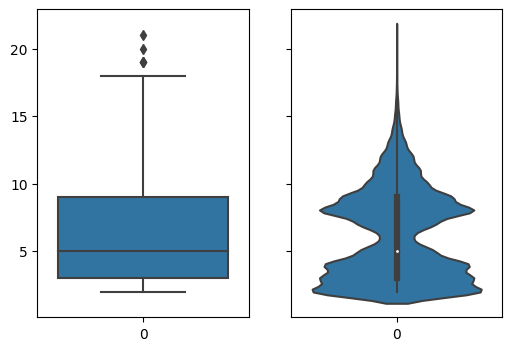

In [67]:
_, axes = plt.subplots(1, 2, sharey = True, figsize = (6, 4))
sns.boxplot(data = install_df["max_lvl"], ax = axes[0])
sns.violinplot(data = install_df["max_lvl"], ax = axes[1]);

Медианное значение максимального уровня, полученнного в игре равно 5.

Интересное наблюдение, что помимо начальных уровней многие игроки дошли до 8 уровня, а затем количество игроков, дошедших до последующих уровней равномерно снижается, доходя до отдельных выбросов к ~20 уровню.

In [68]:
install_df.groupby('max_lvl')['avg_payment_PPU'].value_counts(normalize = True)

max_lvl  avg_payment_PPU
4.0      0.151908           0.500000
         0.304580           0.500000
5.0      0.304580           0.800000
         0.151908           0.200000
6.0      0.304580           0.600000
                              ...   
17.0     0.972519           0.333333
18.0     0.304580           1.000000
19.0     0.282770           0.500000
         1.093384           0.500000
20.0     0.550509           1.000000
Name: avg_payment_PPU, Length: 115, dtype: float64

<AxesSubplot:xlabel='max_lvl'>

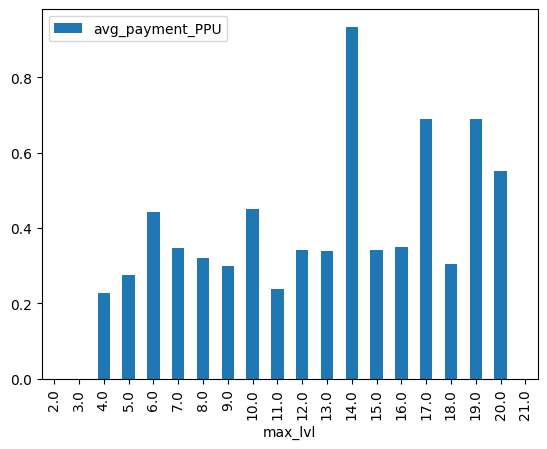

In [69]:
install_df.groupby('max_lvl')[['avg_payment_PPU']].mean().plot(kind = 'bar')

Когда пользователи платят:

На диаграмме видим медиану среднего платежа с платящего пользователя по уровням. 

In [70]:
install_df.groupby('max_lvl')['avg_payment_PPU'].agg(['count', 'sum'])

,count,sum
max_lvl,,
2.0,0,0.000000
3.0,0,0.000000
4.0,2,0.456489
5.0,5,1.370229
6.0,5,2.209924
7.0,11,3.807634
8.0,51,16.322010
9.0,59,17.590331
10.0,49,22.105390


#### time

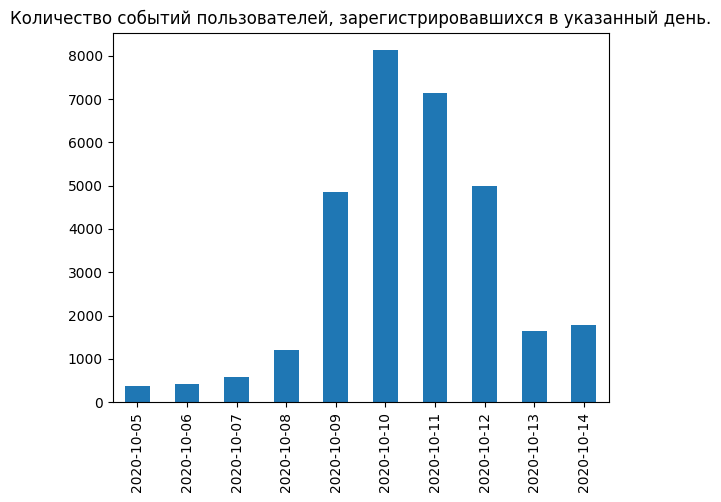

In [71]:
install_df["reg_time"].dt.date.value_counts().sort_index().plot(kind = 'bar')
plt.title('Количество событий пользователей, зарегистрировавшихся в указанный день.')
plt.show()

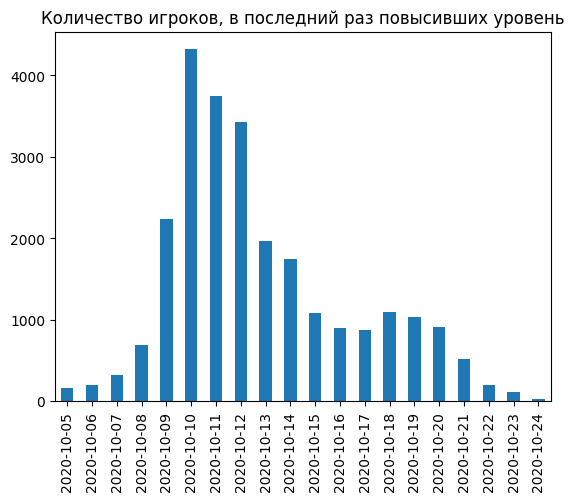

In [72]:
install_df["last_lvl_up_time"].dt.date.value_counts().sort_index().plot(kind = 'bar')
plt.title('Количество игроков, в последний раз повысивших уровень')
plt.show()

Из графиков можем увидеть, что большое число пользователей совершает последний level_up в ближайшие 3-5 дня с момента установки

#### total_payment_PU

Посмотрим на распределение total_payment_PU

Присутствуют выбросы в данных, они закономерны, так как существуют игроки, которые платят больше, но таких немного

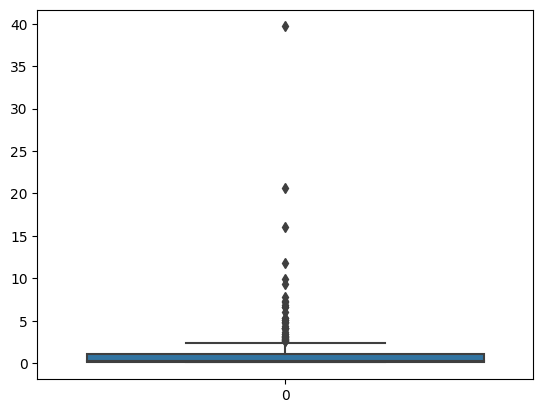

In [73]:
sns.boxplot(install_df.total_payment_PU)
plt.show()

In [74]:
install_df.total_payment_PU.value_counts().sort_index()

0.075573     42
0.151908     96
0.304580     55
0.380153      2
0.456489     13
             ..
9.909160      1
11.748855     1
16.093893     1
20.593130     1
39.689313     1
Name: total_payment_PU, Length: 67, dtype: int64

### payment_df

In [75]:
payment_df.head(3)

,user_id,time,amount,avg_payment,total_payment_PU,avg_payment_PPU,payment_num,avg_current_payment_diff
0,108116306,2020-10-12 12:56:12.634,0.151908,0.545342,0.151908,0.151908,1,0.000000
1,110213686,2020-10-14 16:48:43.059,0.304580,0.545342,5.264885,1.754962,1,1.450382
2,110213686,2020-10-16 04:00:10.547,3.816031,0.545342,5.264885,1.754962,2,-2.061069


In [76]:
payment_df.isna().sum()

user_id                     0
time                        0
amount                      0
avg_payment                 0
total_payment_PU            0
avg_payment_PPU             0
payment_num                 0
avg_current_payment_diff    0
dtype: int64

In [77]:
payment_df.describe()

,user_id,amount,avg_payment,total_payment_PU,avg_payment_PPU,payment_num,avg_current_payment_diff
count,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,7.000000e+02
mean,5.698456e+08,0.545342,5.453424e-01,3.558190,0.545342,3.400000,3.370320e-17
std,2.876664e+08,0.793694,1.111017e-16,5.364546,0.713233,3.839409,3.482080e-01
min,5.688706e+06,0.075573,5.453424e-01,0.075573,0.075573,1.000000,-2.238677e+00
25%,3.576656e+08,0.151908,5.453424e-01,0.304580,0.253690,1.000000,-3.053435e-02
50%,5.999473e+08,0.304580,5.453424e-01,1.522901,0.304580,2.000000,0.000000e+00
75%,8.190286e+08,0.762595,5.453424e-01,4.873282,0.642366,4.000000,5.089059e-02
max,9.977217e+08,7.632824,5.453424e-01,39.689313,6.614885,24.000000,2.951399e+00


Данные по переменной avg_payment_PPU (средний чек с платящего пользователя) вероятнее всего будут иметь положительную асимметрию и длинный хвост (min = 0.075573, mean = 0.545342, max = 6.614885)

Для total_payment_PU (суммарный чек с игрока) будет наблюдатьс примерно такая же картина (min = 0.075573, mean = 3.558190, max = 39.689313, 75% перцентиль = 4.873282)

In [78]:
payment_df.dtypes

user_id                              int64
time                        datetime64[ns]
amount                             float64
avg_payment                        float64
total_payment_PU                   float64
avg_payment_PPU                    float64
payment_num                          int64
avg_current_payment_diff           float64
dtype: object

In [79]:
# разница во времени между платежами
def calculate_payment_diff(df):
    df = df.sort_values(['user_id', 'payment_num'])
    df['payment_time_diff'] = df.groupby('user_id')['time'].diff(1)
    
    
    return df

In [80]:
calculate_payment_diff(payment_df)

,user_id,time,amount,avg_payment,total_payment_PU,avg_payment_PPU,payment_num,avg_current_payment_diff,payment_time_diff
301,5688706,2020-10-17 13:43:32.685,0.304580,0.545342,0.913740,0.304580,1,0.000000,NaT
302,5688706,2020-10-18 03:10:27.349,0.304580,0.545342,0.913740,0.304580,2,0.000000,0 days 13:26:54.664000
303,5688706,2020-10-19 01:14:09.993,0.304580,0.545342,0.913740,0.304580,3,0.000000,0 days 22:03:42.644000
7,11578082,2020-10-11 06:55:04.243,0.304580,0.545342,0.304580,0.304580,1,0.000000,NaT
11,12208022,2020-10-13 09:45:11.970,0.151908,0.545342,2.058779,0.686260,1,0.534351,NaT
...,...,...,...,...,...,...,...,...,...
695,987375864,2020-10-14 09:47:55.399,0.075573,0.545342,0.075573,0.075573,1,0.000000,NaT
696,993353406,2020-10-18 20:45:31.362,0.304580,0.545342,0.609160,0.304580,1,0.000000,NaT
697,993353406,2020-10-18 21:09:18.642,0.304580,0.545342,0.609160,0.304580,2,0.000000,0 days 00:23:47.280000
698,993799116,2020-10-13 13:24:41.889,0.075573,0.545342,0.075573,0.075573,1,0.000000,NaT


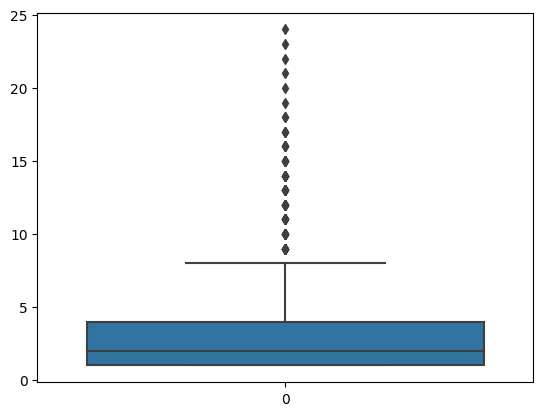

In [81]:
sns.boxplot(payment_df.payment_num)
plt.show()

Чаще всего количество платежей игрока принадлежит [0;4]

### quest_df

In [82]:
quest_df.head(3)

,user_id,start_time,finish_time,quest_num,quest_duration
0,100052283,2020-10-11 08:04:05.260004,2020-10-11 08:04:45.242002,1,0 days 00:00:39.981998
1,100052283,2020-10-11 08:04:45.242001,2020-10-11 08:05:25.770000,2,0 days 00:00:40.527999
2,100052283,2020-10-11 08:05:51.739001,2020-10-11 08:05:59.267001,3,0 days 00:00:07.528000


In [83]:
quest_df.isna().sum()

user_id               0
start_time            0
finish_time       20187
quest_num             0
quest_duration    20187
dtype: int64

Для quest_df миссинги объясняются тем, что не проставлена дата окончания квеста

In [84]:
quest_df.drop('quest_duration', axis = 1, inplace = True)
quest_df.describe()

,user_id,quest_num
count,4.231050e+05,423105.000000
mean,5.032511e+08,13.237653
std,2.871567e+08,10.414822
min,4.278000e+04,1.000000
25%,2.570938e+08,5.000000
50%,5.043223e+08,11.000000
75%,7.504463e+08,19.000000
max,9.998623e+08,78.000000


In [85]:
quest_df.dtypes

user_id                 int64
start_time     datetime64[ns]
finish_time    datetime64[ns]
quest_num               int64
dtype: object

In [86]:
quest_df[['finish_time']] = quest_df[['finish_time']].fillna(0)

In [87]:
quest_df.head(3)

,user_id,start_time,finish_time,quest_num
0,100052283,2020-10-11 08:04:05.260004,2020-10-11 08:04:45.242002,1
1,100052283,2020-10-11 08:04:45.242001,2020-10-11 08:05:25.770000,2
2,100052283,2020-10-11 08:05:51.739001,2020-10-11 08:05:59.267001,3


Создадим бинарный флаг для пользователей, у которых не поставлено время окончания квеста

In [88]:
quest_df["last_quest_flag"] = (quest_df["finish_time"] == 0).astype("int")

In [89]:
quest_df.set_index('user_id')

,start_time,finish_time,quest_num,last_quest_flag
user_id,,,,
100052283,2020-10-11 08:04:05.260004,2020-10-11 08:04:45.242002,1,0
100052283,2020-10-11 08:04:45.242001,2020-10-11 08:05:25.770000,2,0
100052283,2020-10-11 08:05:51.739001,2020-10-11 08:05:59.267001,3,0
100052283,2020-10-11 08:05:59.268001,0,4,1
100073694,2020-10-10 01:41:58.560001,2020-10-10 01:45:18.009002,1,0
...,...,...,...,...
999862290,2020-10-14 07:51:31.387001,2020-10-14 07:51:39.526001,6,0
999862290,2020-10-14 07:54:05.647001,2020-10-14 07:55:17.918001,7,0
999862290,2020-10-14 07:55:17.919001,2020-10-14 07:55:38.013001,8,0


Объединим данные по платежам и квестам, чтобы посмотреть выручку в разбивке по уровням 

In [90]:
payment_df.set_index('user_id', inplace = True)

In [91]:
payments = payment_df[['time', 'amount']]
payments

,time,amount
user_id,,
108116306,2020-10-12 12:56:12.634,0.151908
110213686,2020-10-14 16:48:43.059,0.304580
110213686,2020-10-16 04:00:10.547,3.816031
110213686,2020-10-16 14:57:21.083,1.144275
112803920,2020-10-15 17:48:57.329,0.151908
...,...,...
987375864,2020-10-14 09:47:55.399,0.075573
993353406,2020-10-18 20:45:31.362,0.304580
993353406,2020-10-18 21:09:18.642,0.304580


In [92]:
merged_df = quest_df.set_index('user_id').join(payments, on = 'user_id', how = 'right')
merged_df.head(10)

,start_time,finish_time,quest_num,last_quest_flag,time,amount
user_id,,,,,,
108116306,2020-10-12 12:04:29.099000,2020-10-12 12:04:57.623001,1,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:04:57.623000,2020-10-12 12:05:44.108001,2,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:06:02.590001,2020-10-12 12:06:09.592000,3,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:06:09.592002,2020-10-12 12:10:22.096000,4,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:10:41.591002,2020-10-12 12:13:01.589002,5,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:13:01.589004,2020-10-12 12:13:11.090001,6,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:15:20.591003,2020-10-12 12:16:23.094000,7,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:16:23.094002,2020-10-12 12:16:53.600001,8,0,2020-10-12 12:56:12.634,0.151908
108116306,2020-10-12 12:21:45.099003,2020-10-12 12:21:59.098002,9,0,2020-10-12 12:56:12.634,0.151908


In [93]:
merged_df.groupby('quest_num')[['amount']].agg(['count', 'mean'])

amount          
           count      mean
quest_num                 
1            700  0.545342
2            700  0.545342
3            700  0.545342
4            700  0.545342
5            700  0.545342
...          ...       ...
74           142  0.987233
75           142  0.987233
76            65  1.207681
77            60  1.282939
78            60  1.282939

[78 rows x 2 columns]

Визуализируем количество игроков, прошедших квесты

75% перцентиль quest_num составил 19, поэтому для более наглядной визуализации воронки ограничимся 19 уровнем 

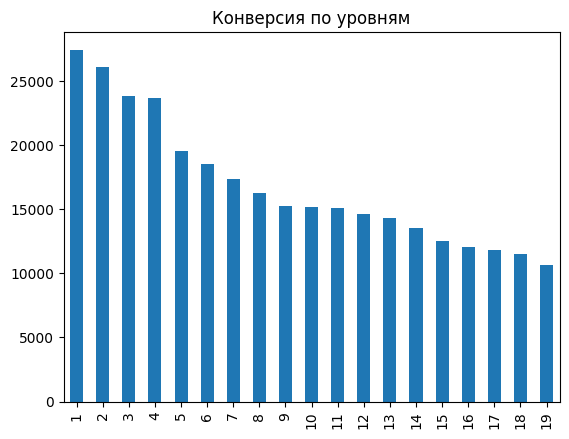

In [94]:
quest_df.loc[quest_df["quest_num"] <= 19]["quest_num"].value_counts().plot(kind = 'bar')
plt.title('Конверсия по уровням')
plt.show()

Мы видим резкое снижение в числе игроков, перешедших с 1 на 2 уровень, со 2 на 3, в начале воронки, в целом, это закономерный результат. Заметное число игроков отваливается при переходе с 4 на 5 уровень. Это может быть обусловлено высокой сложностью уровня, в таком случае может иметь смысл разбить его на несколько. Либо замедлением игрового прогресса: в начале игры идёт буст, затем он отходит, игрока нужно как-то мотивировать, например, отправить ему случайный подарок в виде энергии